# Домашнее задание «Функции и работа с данными»

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:

оценка 2 и меньше - низкий рейтинг
оценка 4 и меньше - средний рейтинг
оценка 4.5 и 5 - высокий рейтинг
Результат классификации запишите в столбец class

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)


In [10]:
path = '/content/drive/MyDrive/Netology/Pandas/Movies/movies.csv'
movies = pd.read_csv(path)

In [11]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
path = '/content/drive/MyDrive/Netology/Pandas/Movies/ratings.csv'
ratings = pd.read_csv(path)

In [13]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
def classify (row):
  rate = 'unknown'
  if row.rating <= 2:
    rate = 'low'
  elif 2 < row.rating <= 4:
    rate = 'medium'
  elif row.rating in [4.5, 5]:
    rate = 'high'

  row['class'] = rate
  return row 

In [10]:
ratings.apply(classify, axis = 1)

,userId,movieId,rating,timestamp,class
0,1.0,1.0,4.0,9.649827e+08,medium
1,1.0,3.0,4.0,9.649812e+08,medium
2,1.0,6.0,4.0,9.649822e+08,medium
3,1.0,47.0,5.0,9.649838e+08,high
4,1.0,50.0,5.0,9.649829e+08,high
...,...,...,...,...,...
100831,610.0,166534.0,4.0,1.493848e+09,medium
100832,610.0,168248.0,5.0,1.493850e+09,high
100833,610.0,168250.0,5.0,1.494273e+09,high
100834,610.0,168252.0,5.0,1.493846e+09,high


In [11]:
# вариант 2 - применительно к столбцу
def classify_v2(rating):
    rate = 'unknown'

    if rating <= 2:
        rate = 'low'
    elif 2 < rating <= 4:
        rate = 'medium'
    elif rating in [4.5, 5]:
        rate = "high"
    
    return rate

In [12]:
ratings['class'] = ratings.rating.apply(classify_v2)
ratings

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium
1,1,3,4.0,964981247,medium
2,1,6,4.0,964982224,medium
3,1,47,5.0,964983815,high
4,1,50,5.0,964982931,high
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,medium
100832,610,168248,5.0,1493850091,high
100833,610,168250,5.0,1494273047,high
100834,610,168252,5.0,1493846352,high


In [14]:
# вариант 3 - использование масок
ratings_v2 = ratings.copy()

In [15]:
ratings_v2['class'] = ''
ratings_v2.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,
1,1,3,4.0,964981247,
2,1,6,4.0,964982224,
3,1,47,5.0,964983815,
4,1,50,5.0,964982931,


In [21]:
ratings_v2.loc[ratings_v2.rating <=2, 'class'] = 'low'
ratings_v2.loc[(2 < ratings_v2.rating) & (ratings_v2.rating <= 4), 'class'] = 'medium'
ratings_v2.loc[ratings_v2.rating.isin([4.5, 5]), 'class'] = 'high'
ratings_v2.head()

,userId,movieId,rating,timestamp,class
0,1,1,4.0,964982703,medium
1,1,3,4.0,964981247,medium
2,1,6,4.0,964982224,medium
3,1,47,5.0,964983815,high
4,1,50,5.0,964982931,high


In [22]:
ratings_v2['class'].value_counts()

medium    65551
high      21762
low       13523
Name: class, dtype: int64

In [23]:
ratings['class'].value_counts()

medium    65551
high      21762
low       13523
Name: class, dtype: int64

#Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}

Результат классификации запишите в отдельный столбец region.



In [5]:
path = '/content/drive/MyDrive/Netology/Pandas/keywords.csv'
keywords = pd.read_csv(path)
keywords['region'] = 'undefined'
keywords.head()


,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [6]:
geo_data = {

    'Центр': ['москва', 'тула', 'ярославль'],

    'Северо-Запад': ['петербург', 'псков', 'мурманск'],

    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

In [7]:
for key, values in geo_data.items():
  keywords.loc[keywords.keyword.str.contains(r'|'.join(values), regex = True, case = False), 'region'] = key

In [8]:
keywords.head()

,keyword,shows,region
0,вк,64292779,undefined
1,одноклассники,63810309,undefined
2,порно,41747114,undefined
3,ютуб,39995567,undefined
4,вконтакте,21014195,undefined


In [9]:
keywords.region.value_counts()

undefined         99253
Центр               385
Северо-Запад        268
Дальний Восток       94
Name: region, dtype: int64

#Задание 3

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

P/S/ все файлы находятся в архиве «дополнительные файлы к лекции и дз»

In [22]:
def production_year(film):
  years = range(1950, 2011)
  for yr in years:
    if str(yr) in film['title']:
      return yr
  
  else:
    return 1900 


In [23]:
movies['year'] = movies.apply(production_year, axis = 1)
movies.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [25]:
rated_movies = movies.merge(ratings, on = 'movieId', how = 'left')
rated_movies.head()

,movieId,title,genres,year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,17.0,4.5,1.305696e+09


In [28]:
yearly_rating = rated_movies.groupby('year').rating.mean().reset_index()
yearly_rating.sort_values('rating', ascending=False)

,year,rating
8,1957,4.039535
5,1954,4.009191
13,1962,3.969466
3,1952,3.953125
23,1972,3.944293
...,...,...
51,2000,3.398922
56,2005,3.359976
43,1992,3.353555
48,1997,3.347241


In [30]:
yearly_rating_excl1900 = yearly_rating[yearly_rating['year']!= 1900]

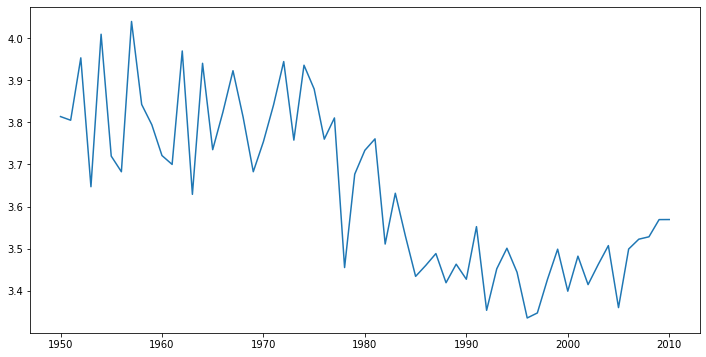

In [31]:
plt.plot(yearly_rating_excl1900['year'], yearly_rating_excl1900['rating'])

In [32]:
import seaborn as sns

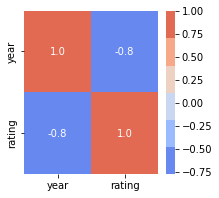

In [34]:
f, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(yearly_rating_excl1900.corr(), annot=True, fmt='.1f', ax=ax, cmap=sns.color_palette('coolwarm', 6))

Вывод

видим довольно сильную отрицательную зависимость (коэффициент корреляции -0,8), т.е. с ростом года выпуска в среднем 
фильмы действительно получают более низкую оценку зрителей